## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


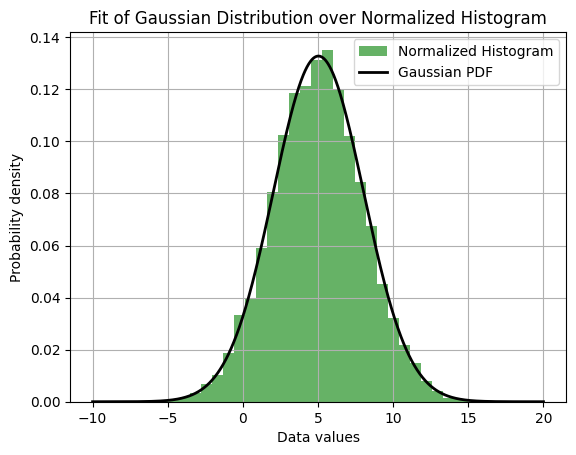

+--------------------------------------+
| Mean: 5.027152443622421              |
| Variance: 9.028667318774586          |
+--------------------------------------+


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Load the data
data = np.load('clean_data.npy')

# Step 2: Calculate the mean and variance using MLE
mean = np.mean(data)
variance = np.var(data)

# Step 3: Define the Gaussian distribution (PDF) with the estimated mean and variance
x = np.linspace(-10, 20, 1000)  # Range of x values for plotting the PDF
pdf = norm.pdf(x, mean, np.sqrt(variance))  # Probability Density Function for Gaussian

# Step 4: Create a normalized histogram of the data
data = data.flatten()  # This will convert data to a 1D array, if it's not already
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Normalized Histogram')

# Step 5: Plot the Gaussian PDF on top of the histogram
plt.plot(x, pdf, 'k', linewidth=2, label='Gaussian PDF')

# Adding a grid
plt.grid(True)

# Title and labels
plt.title('Fit of Gaussian Distribution over Normalized Histogram')
plt.xlabel('Data values')
plt.ylabel('Probability density')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

# ASCII Art Output
border_line = "+" + "-" * 38 + "+"
print(border_line)
print("| Mean: {:<30} |".format(mean))
print("| Variance: {:<26} |".format(variance))
print(border_line)


1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

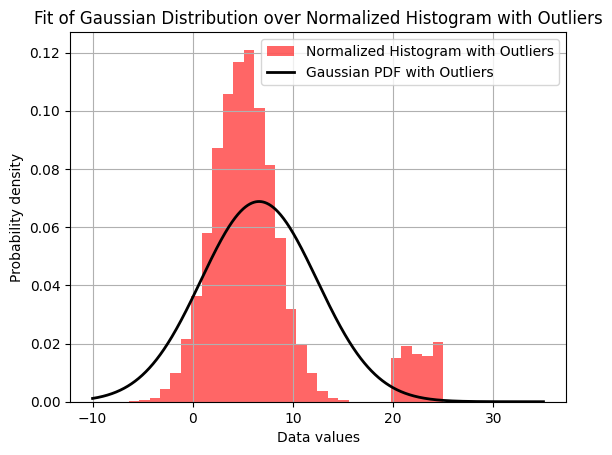

+---------------------------------------------+
| Mean with outliers: 6.614508398212064       |
| Variance with outliers: 33.61185712302579   |
+---------------------------------------------+


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Load the corrupted data
corrupted_data = np.load('corrupted_data.npy')

# Step 2: Calculate the mean and variance using MLE for the corrupted data
corrupted_mean = np.mean(corrupted_data)
corrupted_variance = np.var(corrupted_data)

# Step 3: Define the Gaussian distribution (PDF) with the estimated mean and variance for the corrupted data
x_corrupted = np.linspace(-10, 35, 1000)  # Adjusted range of x values for plotting the PDF
corrupted_pdf = norm.pdf(x_corrupted, corrupted_mean, np.sqrt(corrupted_variance))  # PDF for Gaussian

# Step 4: Create a normalized histogram of the corrupted data
corrupted_data = corrupted_data.flatten()  # Convert data to 1D array if not already
plt.hist(corrupted_data, bins=30, density=True, alpha=0.6, color='r', label='Normalized Histogram with Outliers')

# Step 5: Plot the Gaussian PDF on top of the histogram for the corrupted data
plt.plot(x_corrupted, corrupted_pdf, 'k', linewidth=2, label='Gaussian PDF with Outliers')

# Adding a grid
plt.grid(True)

# Title and labels
plt.title('Fit of Gaussian Distribution over Normalized Histogram with Outliers')
plt.xlabel('Data values')
plt.ylabel('Probability density')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

# ASCII Art Output for Mean and Variance
border_line = "+" + "-" * 45 + "+"
print(border_line)
print("| Mean with outliers: {:<23} |".format(corrupted_mean))
print("| Variance with outliers: {:<19} |".format(corrupted_variance))
print(border_line)


<b>Mean:</b> 
- Outliers can pull the mean toward them, as the mean is sensitive to all data points. 
- If the outliers are significantly higher or lower than the rest of the data, the mean will be skewed in that direction.

The mean has increased from 5.03 to 6.61, indicating that the outliers have likely skewed the data towards the right. This is a typical effect of outliers; if they are predominantly higher than the bulk of the data, they will drag the mean upwards.

<b>Variance:</b> 
- Outliers increase the variance because they increase the average squared distance from the mean. 
- The presence of outliers will typically result in a much larger variance, indicating a wider spread of data.

The variance has a more pronounced increase from 9.03 to 33.62. Variance measures the spread of the data, and the presence of outliers can dramatically increase this spread because they contribute heavily to the sum of the squared differences from the mean.

The mismatch between the Gaussian PDF and the normalized histogram in this graph suggests that the underlying data is not normally distributed due to the outliers.

These occurred because MLE does not distinguish between typical data points and outliers; it treats all data points as equally representative of the underlying distribution. If the data is corrupted by outliers, the estimated Gaussian distribution using MLE will be affected, reflecting these atypical data points in the estimated mean and variance.

1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

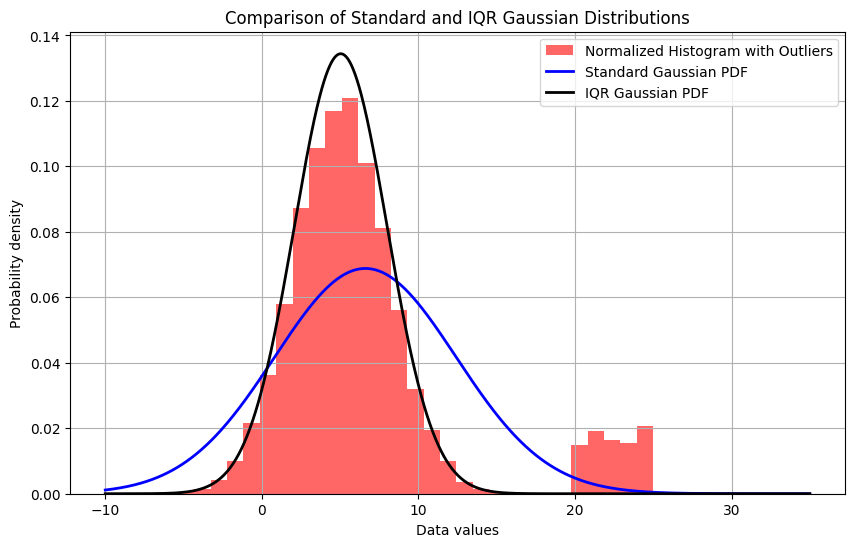


+------------------------------------+-------------------+-------------------+
| Description                        | Mean              | Variance          |
+------------------------------------+-------------------+-------------------+
| Clean Data (Exercise 1.1)          | 5.027152443622421 | 9.028667318774586 |
| Corrupted Data (Standard, Ex 1.2)  | 6.614508398212064 | 33.61185712302579 |
| Corrupted Data (IQR, Ex 1.3)       | 5.039489288824858 | 8.810006300839856 |
+------------------------------------+-------------------+-------------------+



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the corrupted data
corrupted_data = np.load('corrupted_data.npy')  # Uncomment and set your file path

# Standard Gaussian fit using mean and variance for corrupted data (Exercise 1.2)
corrupted_mean = np.mean(corrupted_data)
corrupted_variance = np.var(corrupted_data)
x_corrupted = np.linspace(-10, 35, 1000)  # Adjusted range for plotting the PDF
standard_gaussian_pdf = norm.pdf(x_corrupted, corrupted_mean, np.sqrt(corrupted_variance))

# IQR-based approach to filter out outliers
Q1 = np.percentile(corrupted_data, 25)
Q3 = np.percentile(corrupted_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data_iqr = corrupted_data[(corrupted_data >= lower_bound) & (corrupted_data <= upper_bound)]

# Fit a Gaussian distribution to the IQR-filtered data
iqr_mean = np.mean(filtered_data_iqr)
iqr_variance = np.var(filtered_data_iqr)
iqr_gaussian_pdf = norm.pdf(x_corrupted, iqr_mean, np.sqrt(iqr_variance))

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(corrupted_data, bins=30, density=True, alpha=0.6, color='r', label='Normalized Histogram with Outliers')
plt.plot(x_corrupted, standard_gaussian_pdf, 'b', linewidth=2, label='Standard Gaussian PDF')
plt.plot(x_corrupted, iqr_gaussian_pdf, 'k', linewidth=2, label='IQR Gaussian PDF')
plt.grid(True)
plt.title('Comparison of Standard and IQR Gaussian Distributions')
plt.xlabel('Data values')
plt.ylabel('Probability density')
plt.legend()
plt.show()

# Mean and variance from Exercise 1.1 (clean data)
clean_mean = 5.027152443622421
clean_variance = 9.028667318774586

# Creating a table for comparison
table_iqr = f'''
+------------------------------------+-------------------+-------------------+
| Description                        | Mean              | Variance          |
+------------------------------------+-------------------+-------------------+
| Clean Data (Exercise 1.1)          | {clean_mean:<17} | {clean_variance:<16} |
| Corrupted Data (Standard, Ex 1.2)  | {corrupted_mean:<17} | {corrupted_variance:<16} |
| Corrupted Data (IQR, Ex 1.3)       | {iqr_mean:<17} | {iqr_variance:<16} |
+------------------------------------+-------------------+-------------------+
'''

print(table_iqr)


<p><b>Clean Data (Exercise 1.1):</b> The estimated mean (5.03) and variance (9.03) are representative of the data, assuming no significant outliers are present. These values are assumed to reflect the true parameters of the underlying Gaussian distribution from which the data was sampled.</p>

<p><b>Corrupted Data (Standard, Ex 1.2):</b> When the data is corrupted with outliers, the standard estimators (mean and variance) are significantly affected. The mean increases to 6.61, and the variance balloons to 33.61. These changes are due to the outliers pulling the mean away from the central bulk of the data and inflating the variance, which squares the deviations, hence magnifying the impact of outliers.</p>

<p><b>Corrupted Data (Robust using IQR, Ex 1.3):</b> Applying the IQR method for robust estimation significantly reduces the impact of outliers. The IQR, which quantifies the spread of the middle 50% of the data, is intrinsically resistant to extreme values. By filtering out data points that fall outside 1.5 times the IQR from the quartiles, the focus shifts to a more representative 'central' portion of the data. This leads to a Gaussian distribution that better reflects the bulk of the dataset.</p>

<p><b>Explanation of the IQR Method's Robustness:</b></p>

<b>1.) IQR as a Measure of Spread:</b>

- The IQR is the range between the 25th and 75th percentiles of the dataset. It concentrates on the dataset's central part, excluding the tails where outliers are usually found.
- This focus on the middle portion of the data, rather than the entire range, makes the IQR a robust measure of spread. It is less affected by extreme values compared to standard deviation or variance.

<b>2.) Gaussian Distribution Fitted to IQR-Filtered Data:</b>

- Fitting a Gaussian distribution to data refined using the IQR method yields a model less skewed by outliers and more representative of the dataset's core.
- The resulting mean and variance (approx. 5.04 and 8.81, respectively) from this fit are more aligned with those of the clean data, indicating that the IQR method effectively minimizes the influence of outliers.

<b>Conclusion: </b>

The IQR method proves to be an effective tool for handling outliers in data analysis. By focusing on the central portion of the data and diminishing the impact of extreme values, the Gaussian distribution fitted to the IQR-filtered data offers a more accurate reflection of the dataset's inherent characteristics. This approach ensures that the fitted model is representative of the majority of the data, providing a reliable basis for further analysis.

# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size (N×3) that has been reshaped into a vector of size (N∗3×1)
. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the "explained variance" (not singular values) associated with each of the eigenvectors.

**(5 marks)**

In [4]:
import numpy as np
from sklearn.decomposition import PCA

# Load the data
file_path = 'shape_array.npy'
shape_array = np.load(file_path)

# Transpose the data if needed (if samples are columns)
shape_array = shape_array.T

# Initialize PCA. Since there are 7 samples, we will compute 7 principal components
pca = PCA(n_components=7)

# Fit PCA on the data
pca.fit(shape_array)

# Extracting the eigenvectors (principal components)
eigenvectors = pca.components_

# Extracting the coordinates in the new space (PCA coordinates)
pca_coordinates = pca.transform(shape_array)

# Extracting the explained variance
explained_variance = pca.explained_variance_

# Display the results
print("Eigenvectors (Principal Components): \n", eigenvectors)
print("\nPCA Coordinates: \n", pca_coordinates)
print("\nExplained Variance: \n", explained_variance)


Eigenvectors (Principal Components): 
 [[-0.00414572 -0.05745344 -0.03575946 ...  0.03766389 -0.03702777
   0.03551192]
 [-0.01415537  0.05170194 -0.05249316 ...  0.01730633 -0.01251886
  -0.0314125 ]
 [-0.00842138 -0.05345461 -0.01210246 ...  0.0025898   0.04529303
  -0.01588674]
 ...
 [-0.04165646 -0.00579226 -0.00943088 ... -0.04892855 -0.04934673
   0.01277646]
 [ 0.00589867 -0.04622684  0.03162158 ... -0.07489542  0.00635543
  -0.11313104]
 [ 0.08956427 -0.02271833  0.06620993 ...  0.00056115 -0.00089162
  -0.04601227]]

PCA Coordinates: 
 [[ 8.65868106e-03 -8.03143810e-03  5.70059242e-03 -5.20328106e-03
   1.15086921e-02 -1.51201722e-03  1.65911107e-08]
 [-4.78102490e-02 -2.49408819e-02 -2.03561643e-03 -6.21949136e-03
  -4.22784593e-03 -2.55283969e-03  1.68756316e-08]
 [-3.52272168e-02  1.52638583e-02  8.10755510e-03  1.83543358e-02
   8.45021743e-04  5.09414473e-04  1.73983992e-08]
 [-3.48244119e-03  3.39013934e-02 -1.22609194e-02 -9.48668085e-03
  -8.24642193e-04 -1.78459671e-0

2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the "explained variance" (not singular values) estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

In [5]:
# Correcting the code for 2.2 to align matrix dimensions properly

import numpy as np
from sklearn.decomposition import PCA

# Load the data
file_path = 'shape_array.npy'
shape_array = np.load(file_path)

# Assuming 'data' is the shape_array loaded earlier
shape_array = shape_array.T  # Transposing if necessary

# Perform PCA using scikit-learn's PCA
pca = PCA(n_components=7)
pca.fit(shape_array)
explained_variance_pca = pca.explained_variance_

# Perform eigendecomposition of the covariance matrix
# Mean centering the data for eigendecomposition
mean_centered_data = shape_array - np.mean(shape_array, axis=0)
covariance_matrix = np.cov(mean_centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sorting eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]

# Finding new coordinates in the new coordinate space defined by the estimated eigenvectors
new_coordinates = np.dot(sorted_eigenvectors.T, mean_centered_data.T)

# Display the results
print("Explained Variance (PCA): \n", np.real(explained_variance_pca))
print("\nSorted Eigenvalues (Eigendecomposition): \n", np.real(sorted_eigenvalues[:7]))
print("\nNew Coordinates in Eigenvector Space: \n", np.real(new_coordinates.T))

Explained Variance (PCA): 
 [1.1398973e-03 3.8329800e-04 1.4392454e-04 1.1443542e-04 3.1203726e-05
 1.1333174e-05 3.3299022e-16]

Sorted Eigenvalues (Eigendecomposition): 
 [1.13989731e-03 3.83298015e-04 1.43924451e-04 1.14435391e-04
 3.12036972e-05 1.13331635e-05 1.08450113e-19]

New Coordinates in Eigenvector Space: 
 [[ 8.65868278e-03  8.03143855e-03 -5.70059139e-03 ...  4.39627591e-10
   3.20204933e-10  3.20204933e-10]
 [-4.78102045e-02  2.49408721e-02  2.03563476e-03 ...  4.39627591e-10
   3.20204937e-10  3.20204937e-10]
 [-3.52272572e-02 -1.52638448e-02 -8.10759034e-03 ...  4.39627591e-10
   3.20204937e-10  3.20204937e-10]
 ...
 [ 4.86487354e-02  1.21018169e-02  1.02909283e-02 ...  4.39627590e-10
   3.20204933e-10  3.20204933e-10]
 [-9.27925616e-05  8.21503214e-03  9.55762714e-03 ...  4.39627587e-10
   3.20204933e-10  3.20204933e-10]
 [ 2.93052925e-02 -4.12392512e-03 -2.03369421e-02 ...  4.39627590e-10
   3.20204934e-10  3.20204934e-10]]


<b>Summary of Differences:</b>

<b>1.) Eigenvectors vs. Explained Experiemce: </b> 
- Eigenvalues from the eigendecomposition and the explained variance from PCA are essentially the same. This similarity is expected since PCA is mathematically related to the eigendecomposition of the covariance matrix.
- PCA's explained variance represents the amount of variance captured by each principal component. Similarly, in eigendecomposition, the eigenvalues indicate the variance captured along each eigenvector.

<b>2.) Difference in Values: </b> 
- The minor differences observed between the eigenvalues and the explained variance are likely due to numerical precision and computational rounding errors.
- The last eigenvalue in the eigendecomposition being significantly smaller (of the order of 10<sup>-20</sup>) compared to the last explained variance in PCA (of the order of 10<sup>-16</sup>) is likely due to the numerical methods used in calculations, which can lead to very small, but non-zero values in floating-point arithmetic.


In summary, the eigenvalues obtained from the eigendecomposition of the covariance matrix and the explained variance from PCA are conceptually and numerically very similar, with any minor discrepancies likely arising from the nuances of floating-point computation in numerical linear algebra. Both sets of values reveal the inherent structure of the data in terms of its variance distribution along orthogonal directions in the feature space.

2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

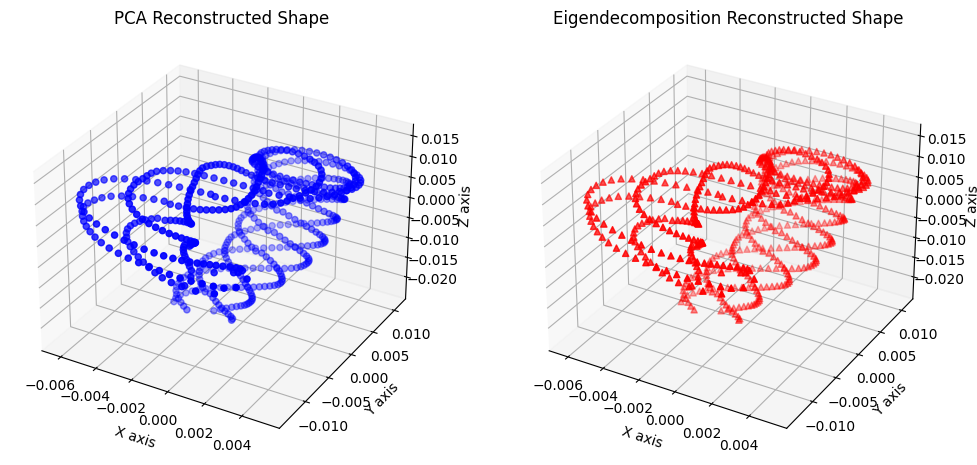

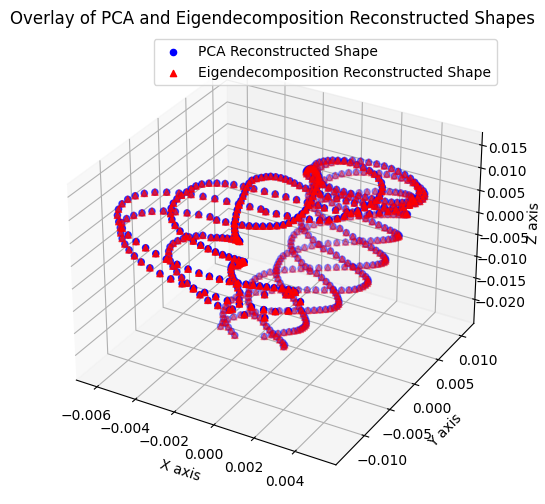

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reload the data
shape_array = np.load('shape_array.npy')

# Fit PCA on the whole dataset (transposed to treat columns as individual samples)
pca = PCA(n_components=7)
pca.fit(shape_array.T)

# Project and reconstruct a selected shape using PCA (e.g., the first shape)
selected_shape_pca = shape_array[:, 0]
pca_coordinates = pca.transform(selected_shape_pca.reshape(1, -1))
reconstructed_shape_pca = pca.inverse_transform(pca_coordinates)
reconstructed_shape_pca = reconstructed_shape_pca.reshape(-1, 3)

# Perform eigendecomposition of the covariance matrix
covariance_matrix = np.cov(shape_array.T, rowvar=False)
# Ensure the matrix is symmetric
covariance_matrix = (covariance_matrix + covariance_matrix.T) / 2
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
idx = eigenvalues.argsort()[::-1]
sorted_eigenvectors = eigenvectors[:, idx].real  # Take only the real part

# Project the selected shape onto the eigenspace and reconstruct it
selected_shape_eigen = selected_shape_pca - pca.mean_
eigen_coordinates = np.dot(sorted_eigenvectors.T, selected_shape_eigen).real  # Real part
reconstructed_shape_eigen = np.dot(sorted_eigenvectors, eigen_coordinates) + pca.mean_
reconstructed_shape_eigen = reconstructed_shape_eigen.reshape(-1, 3).real  # Real part

# Plotting the reconstructed shapes in 3D

# Create a figure for the plots
fig = plt.figure(figsize=(12, 6))

# Plot for PCA reconstructed shape
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(reconstructed_shape_pca[:, 0], reconstructed_shape_pca[:, 1], reconstructed_shape_pca[:, 2], c='blue', marker='o')
ax1.set_title('PCA Reconstructed Shape')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

# Plot for Eigendecomposition reconstructed shape
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(reconstructed_shape_eigen[:, 0], reconstructed_shape_eigen[:, 1], reconstructed_shape_eigen[:, 2], c='red', marker='^')
ax2.set_title('Eigendecomposition Reconstructed Shape')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')

# Create a figure for the overlay plot
fig_overlay = plt.figure(figsize=(8, 6))

# Plotting both PCA and Eigendecomposition reconstructed shapes in the same 3D plot
ax_overlay = fig_overlay.add_subplot(111, projection='3d')

# Plot PCA reconstructed shape
ax_overlay.scatter(reconstructed_shape_pca[:, 0], reconstructed_shape_pca[:, 1], reconstructed_shape_pca[:, 2], 
                   c='blue', marker='o', label='PCA Reconstructed Shape')

# Plot Eigendecomposition reconstructed shape
ax_overlay.scatter(reconstructed_shape_eigen[:, 0], reconstructed_shape_eigen[:, 1], reconstructed_shape_eigen[:, 2], 
                   c='red', marker='^', label='Eigendecomposition Reconstructed Shape')

# Set titles and labels
ax_overlay.set_title('Overlay of PCA and Eigendecomposition Reconstructed Shapes')
ax_overlay.set_xlabel('X axis')
ax_overlay.set_ylabel('Y axis')
ax_overlay.set_zlabel('Z axis')

# Add legend
ax_overlay.legend()

# Show the plot
plt.show()


<b>Observations:</b>

- <b>PCA Recosntructed Shape: </b> This is visualized in blue in the left plot. It represents the shape reconstructed using the new coordinates estimated from PCA.
- <b>Eigendecomposition Reconstructed Shape: </b> Shown in red in the right plot, this shape is reconstructed using the new coordinates obtained through eigendecomposition.

Both reconstructed shapes appear to be very similar, indicating that the principal components identified by PCA and the eigenvectors from the covariance matrix's eigendecomposition capture similar aspects of the data's variance and structure. This similarity underscores the effectiveness of both methods in representing the original data's structure.

<b>Why PCA is Described as an Approach for Dimensionality Reduction/Data Compression?</b>

PCA is commonly used for dimensionality reduction because it identifies the directions (principal components) in which the data varies the most. By projecting data onto these principal components, PCA reduces the number of dimensions needed to represent the data while retaining the most significant variance. This makes PCA an effective tool for data compression, as it allows for a more compact representation of the data with minimal loss of information, thereby facilitating more efficient storage, processing, and analysis. ​



# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**

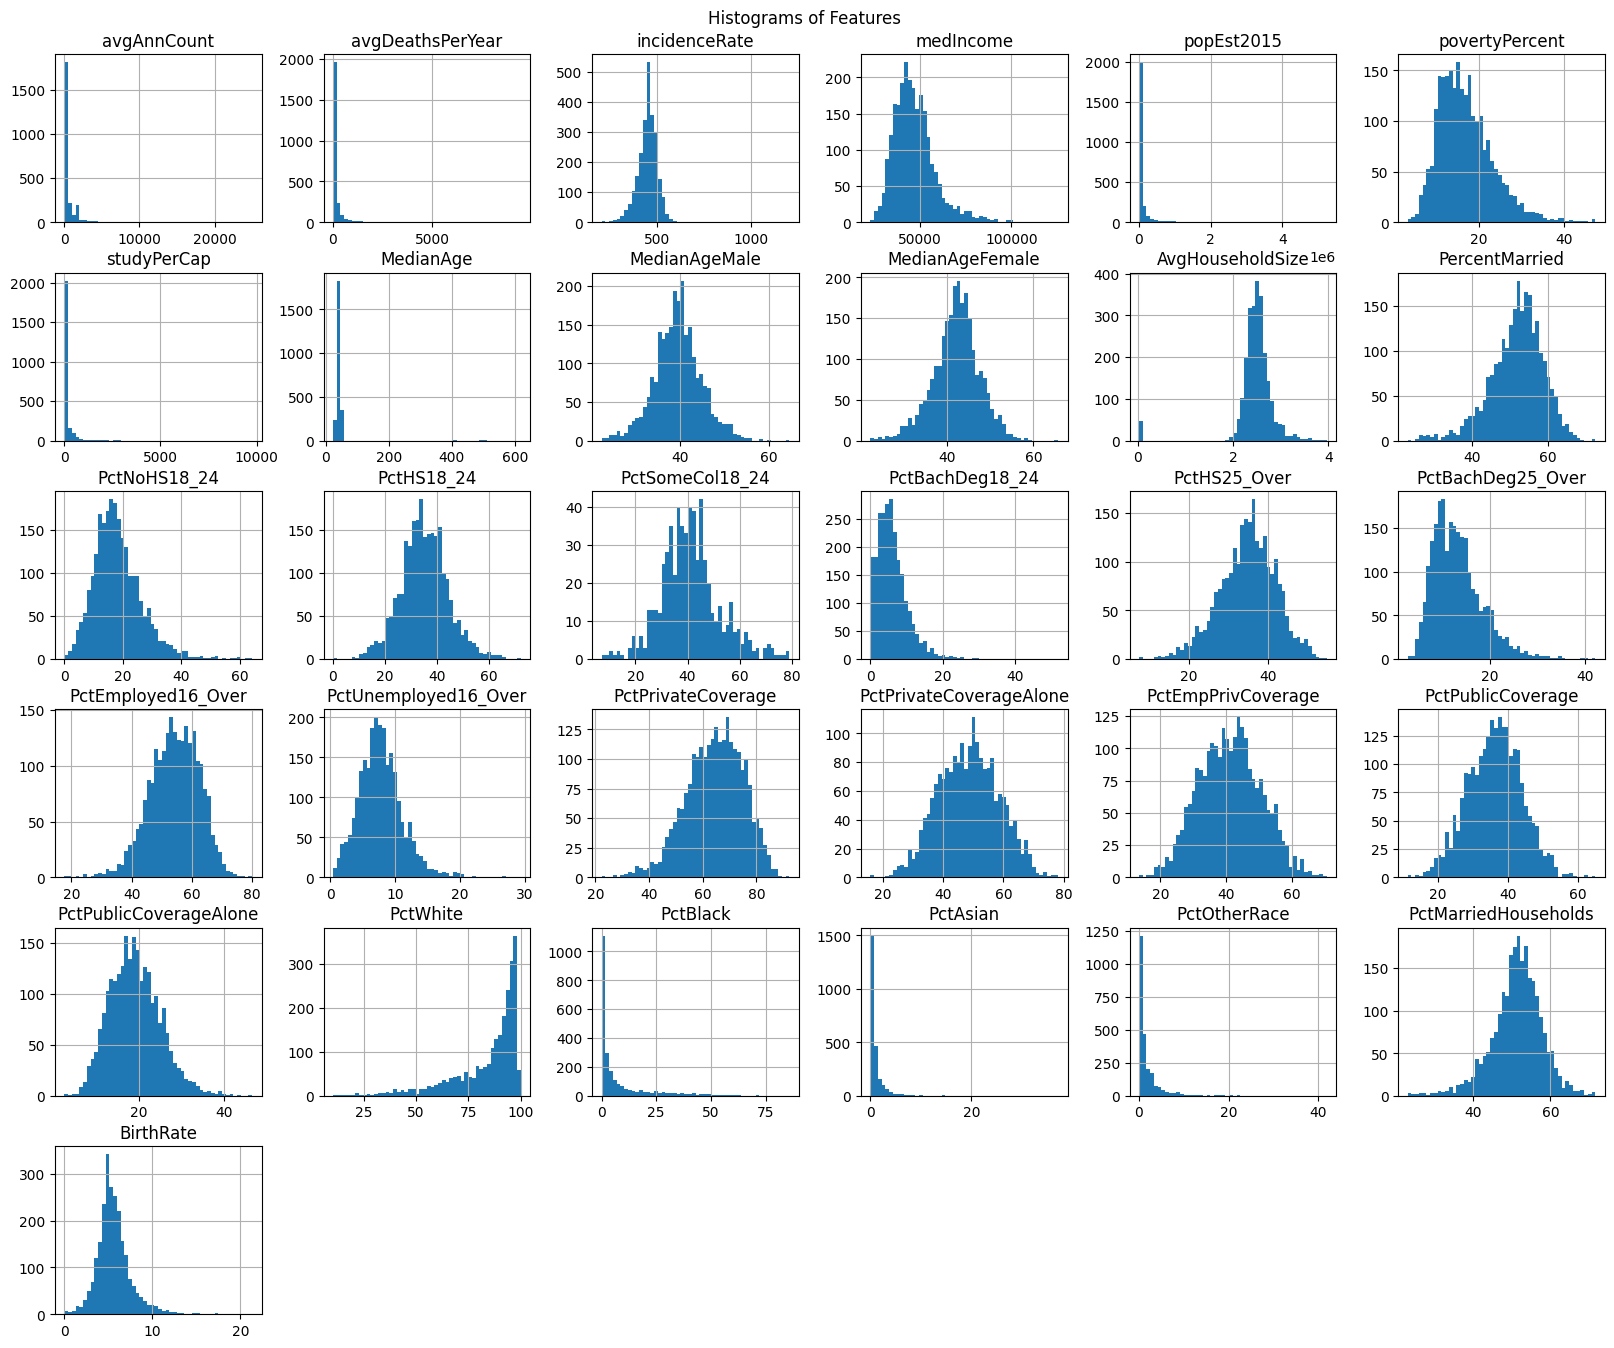

Top five features with strongest correlations to targets:
PctBachDeg25_Over         0.491411
incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
medIncome                 0.416607
povertyPercent            0.413260
dtype: float64


/home/htootayzaaung/anaconda3/envs/ai/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


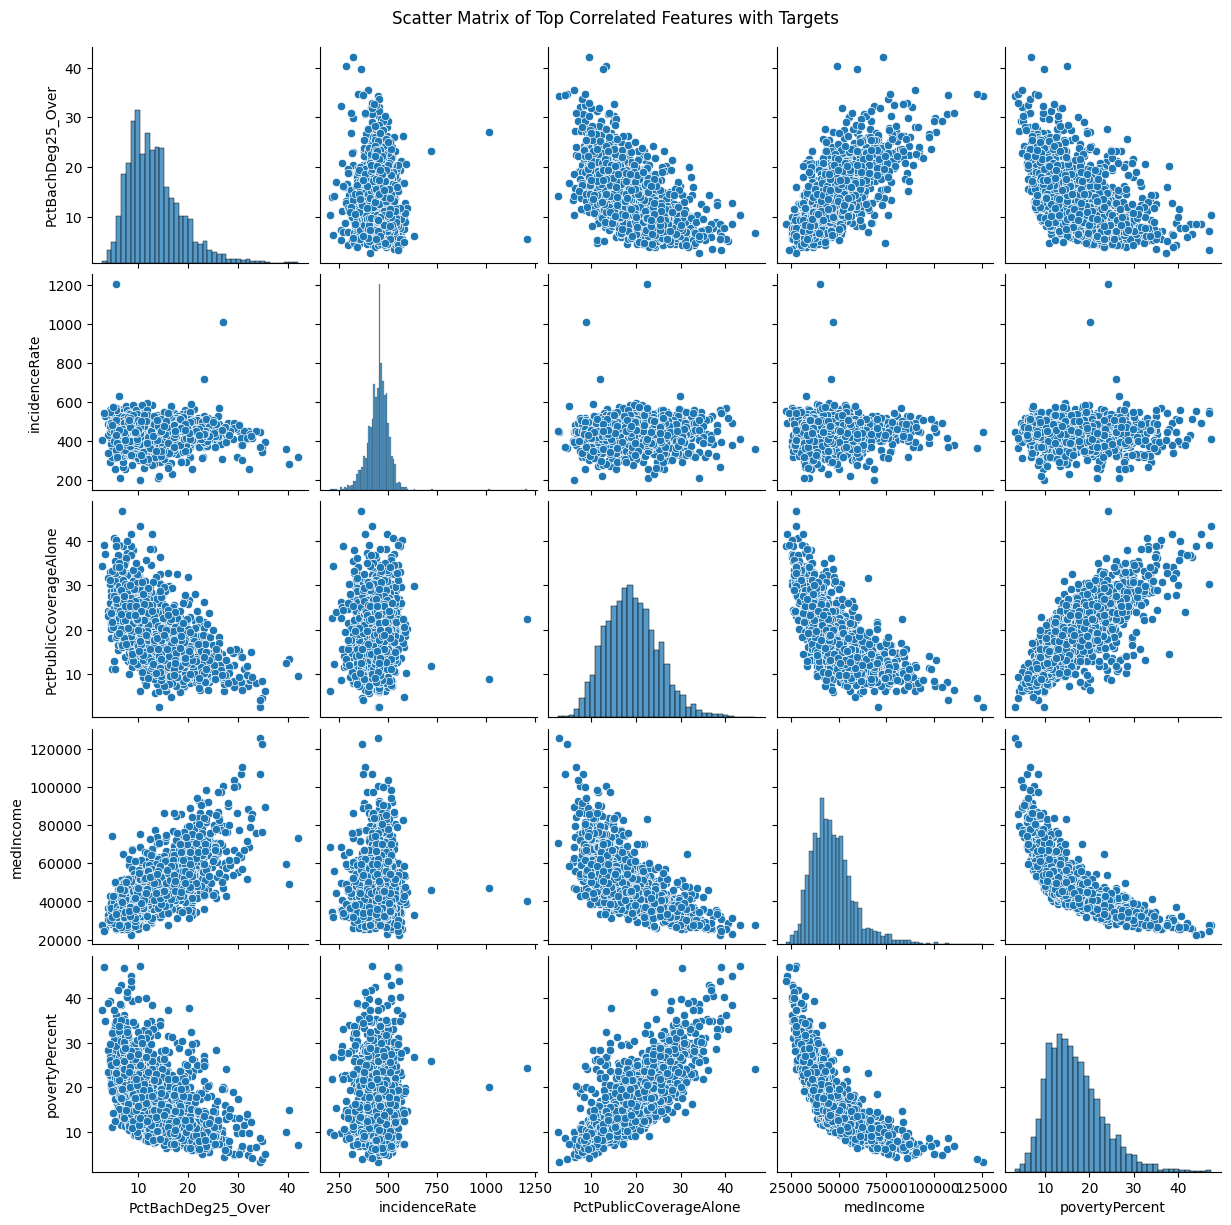

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data and targets
training_data_path = 'Training_data.csv'
targets_path = 'Training_data_targets.csv'

training_data = pd.read_csv(training_data_path)
targets = pd.read_csv(targets_path)

# Plot histograms of all features to visualize their distributions
training_data.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histograms of Features")
plt.subplots_adjust(top=0.95)
plt.show()

# Compute absolute correlations of all features with the target variable and sort them
absolute_correlations = training_data.corrwith(targets.iloc[:, 0]).abs().sort_values(ascending=False)

# Display the top five features with the strongest absolute correlations to the target variable
top_five_correlations = absolute_correlations.head()
print("Top five features with strongest correlations to targets:")
print(top_five_correlations)

# Select the top five features with the strongest absolute correlations
top_features = absolute_correlations.head(5).index.tolist()

# Prepare data for the scatter matrix plot
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
scatter_matrix_data = training_data[top_features].copy()
scatter_matrix_data['TARGET_deathRate'] = targets.iloc[:, 0]

# Plot scatter matrix
sns.pairplot(scatter_matrix_data, vars=top_features)
plt.suptitle("Scatter Matrix of Top Correlated Features with Targets")
plt.subplots_adjust(top=0.95)
plt.show()


<b>Observation from Scatter plots: </b>

<p><b>1.) Mean Incidence Rate vs. Cancer Mortality Rate:</b> There seems to be a positive correlation, indicating that higher incidence rates of cancer in a county are associated with higher mortality rates.</p>
<p><b>2.) Percent Public Coverage Alone vs. Cancer Mortality Rate:</b>Counties with a higher percentage of public coverage alone might correlate with higher cancer mortality rates. This could be due to various factors, including the overall health and socio-economic status of the population.</p>
<p><b>3.) Poverty Percent vs. Cancer Mortality Rate:</b> A similar positive correlation is observed here, suggesting that counties with higher poverty rates may experience higher cancer mortality rates.</p>
<p><b>4.) Percent Bachelor's Degree (25+) vs. Cancer Mortality Rate:</b> This feature had the highest correlation with cancer mortality rates. This might suggest a link between educational attainment and health outcomes.</p>
<p><b>5.) Percent Public Coverage vs. Cancer Mortality Rate:</b> Similar to all of the observations above, this feature also shows a positive linear relationship with the cancer mortality rate.</p>


*   Top five features with strongest correlations to targets are: incidenceRate, PctBachDeg25_Over, PctPublicCoverageAlone, medIncome and povertyPercent (2 marks for this description and code above).

Top five features with strongest correlations to targets:<br>
PctBachDeg25_Over         0.491411<br>
incidenceRate             0.443983<br>
PctPublicCoverageAlone    0.439734<br>
medIncome                 0.416607<br>
povertyPercent            0.413260<br>


*   There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models. (1.5 marks for code above and this discussion)

In [8]:
import pandas as pd

# Load the original training data
training_data_path = 'Training_data.csv'  # Replace with your actual file path
original_training_data = pd.read_csv(training_data_path)

# Identifying records with MedianAge > 100
outliers_median_age = original_training_data[original_training_data['MedianAge'] > 100]

# Displaying the outliers
print("Records with MedianAge > 100:")
print(outliers_median_age)

# Removing these records from the dataset
cleaned_training_data = original_training_data[original_training_data['MedianAge'] <= 100]

# Display the shape of the original and cleaned datasets to compare
original_shape = original_training_data.shape
cleaned_shape = cleaned_training_data.shape

print(f"\nOriginal Dataset Shape: {original_shape}")
print(f"Cleaned Dataset Shape: {cleaned_shape}")


Records with MedianAge > 100:
      avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
186     95.000000                32     469.000000      32903       15658   
207     89.000000                32     447.200000      61802       17110   
286     25.000000                10     555.700000      34936        5685   
366    240.000000                95     501.400000      49897       37519   
486    554.000000               228     457.800000      43972      103451   
536     99.000000                38     463.300000      58234       16401   
570    599.000000               250     489.900000      39927      128755   
621    883.000000               329     389.500000      61501      285174   
659    281.000000               112     433.200000      57126       51659   
848    765.000000               265     492.300000      70705      126517   
866    769.000000               276     494.200000      47175      127253   
869    230.000000                98     477.80

In the table above, 26 records in the MedianAge column with values exceeding 100, which are clearly outliers.


There have been 5 cases  where the average annual count of cancer cases <b>avgAnnCount</b> exceeds the total population of a county <b>popEst2015</b> is highly unusual and generally not feasible under normal circumstances. Here are a few reasons why this might appear in the data:

<b>1.) Data Reporting Error:</b> It's possible that the data has been incorrectly reported or entered. Such anomalies are often due to human error in data entry or misinterpretation of the data definitions.

<b>2.) Misinterpretation of the Variable:</b> If avgAnnCount represents aggregated or cumulative cases over multiple years, it could potentially exceed the population in a single year. However, this would be a misinterpretation of the term "average annual count."

<b>3.) Data Collection Anomalies:</b> The methodology used to collect or calculate avgAnnCount might differ from standard practices, leading to figures that don't align with expectations based on the population size.

In standard epidemiological and demographic contexts, the number of new cancer cases diagnosed annually (incidence) should not exceed the total population of the area in question. If it does, it's usually a clear indicator of a data quality issue.

It's important to verify such anomalies with the data provider or to consult additional data sources for clarification. For modeling or analysis purposes, treating these records as outliers or errors until they can be verified is often the safest approach.

*   medIncome and povertyPercent are negatively correlated to each other as you would expect.
*   povertyPercent and PctBachDeg25_Over are also negatively correlated highlighting that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25. povertyPercent also shows a strong positive correlation with PctPublicCoverageAlone, indicating that poverty stricken counties are less likely to be able to afford private healthcare coverage.
*   Similarly, PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. (1.5 marks for discussion of at least two sets of features that show correlations and code above)

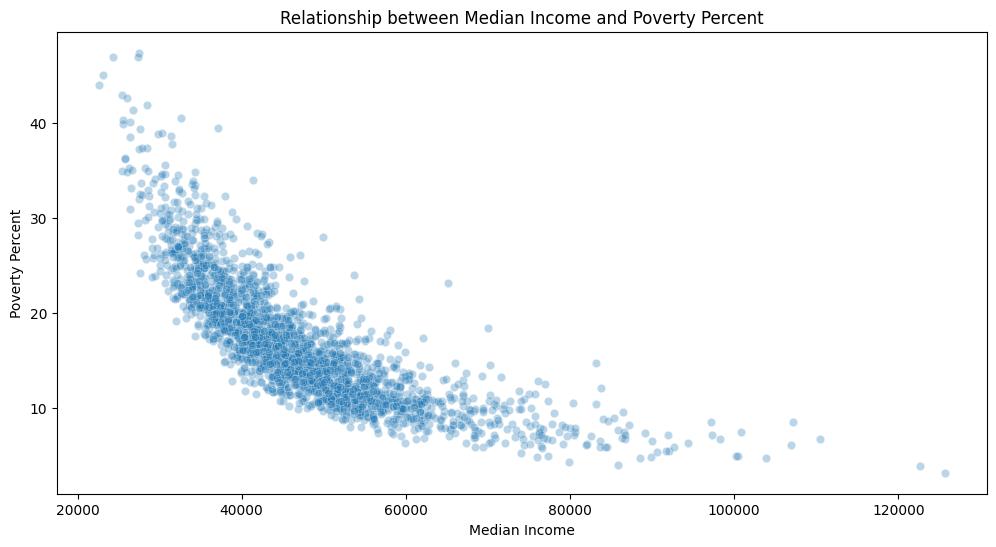

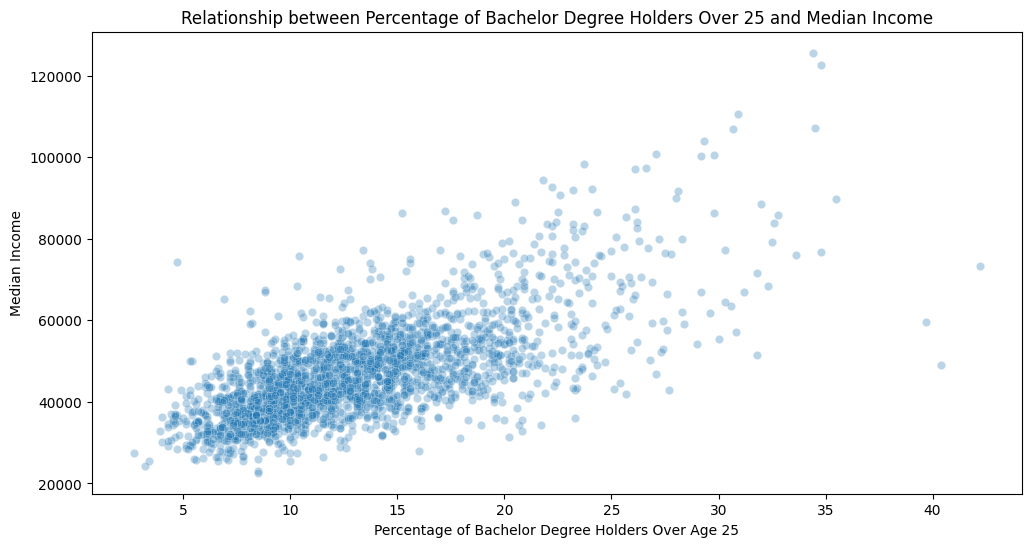

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
training_data_path = 'Training_data.csv'  # Replace with your actual file path
data = pd.read_csv(training_data_path)

# Plotting the relationship between medIncome and povertyPercent
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='medIncome', y='povertyPercent', alpha=0.3)
plt.title('Relationship between Median Income and Poverty Percent')
plt.xlabel('Median Income')
plt.ylabel('Poverty Percent')
plt.show()

# Plotting the relationship between PctBachDeg25_Over and medIncome
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='PctBachDeg25_Over', y='medIncome', alpha=0.3)
plt.title('Relationship between Percentage of Bachelor Degree Holders Over 25 and Median Income')
plt.xlabel('Percentage of Bachelor Degree Holders Over Age 25')
plt.ylabel('Median Income')
plt.show()


<p><b>1.) Relationship between medIncome and povertyPercent:</b><br>

- This relationship is fundamental as it directly relates income levels to poverty rates. Higher median income in a county typically indicates better economic conditions, which should inversely correlate with the poverty rate.
- The plot shows a clear negative correlation between <b>medIncome</b> and <b>povertyPercent</b>. As median income increases, the poverty percent tends to decrease. This relationship is consistent with suggests that higher income levels in a county are generally associated with lower poverty rates. It highlights the direct impact of economic conditions on the well-being of the population.</p>

<p><b>2.) Relationship between PctBachDeg25_Over (Percentage of Bachelor's Degree Holders Over Age 25) and medIncome:</b><br>

- This set explores the correlation between educational attainment and median income. Generally, higher education levels are associated with higher income.
- This plot illustrates a positive correlation between PctBachDeg25_Over and medIncome. Counties with a higher percentage of residents holding a bachelor's degree over the age of 25 tend to have higher median incomes. 
</p>

**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

In [10]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the training data and targets
training_data_path = 'Training_data.csv'
targets_path = 'Training_data_targets.csv'

training_data = pd.read_csv(training_data_path)
targets = pd.read_csv(targets_path)

# Define the pipeline steps
pipeline_steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values using the median
    ('std_scaler', StandardScaler()),  # Standardize features
]

# Create the pipeline
preprocessing_pipeline = Pipeline(steps=pipeline_steps)

# Apply the pipeline to your training data
training_data_prepared = preprocessing_pipeline.fit_transform(training_data)

# Now 'training_data_prepared' is the pre-processed version of your data, ready for model fitting


**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Load the training data and targets
training_data_path = 'Training_data.csv'
targets_path = 'Training_data_targets.csv'

training_data = pd.read_csv(training_data_path)
targets = pd.read_csv(targets_path)

# Define the pipeline steps
pipeline_steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values using the median
    ('std_scaler', StandardScaler()),  # Standardize features
]

# Create the pipeline
preprocessing_pipeline = Pipeline(steps=pipeline_steps)

# Apply the pipeline to your training data
training_data_prepared = preprocessing_pipeline.fit_transform(training_data)

# Now 'training_data_prepared' is the pre-processed version of your data, ready for model fitting


# Load the target variable, assuming it's a single column
target = targets.iloc[:, 0]

# Ordinary Least Squares (OLS) Model
ols_model = LinearRegression()
ols_model.fit(training_data_prepared, target)
ols_predictions = ols_model.predict(training_data_prepared)
ols_rmse = np.sqrt(mean_squared_error(target, ols_predictions))

# Lasso Model
# Using GridSearchCV to find the best regularization weight
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(training_data_prepared, target)
lasso_best_alpha = lasso_regressor.best_params_['alpha']
lasso_best_rmse = np.sqrt(-lasso_regressor.best_score_)

# Ridge Model
# Again using GridSearchCV for the best regularization weight
ridge = Ridge()
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(training_data_prepared, target)
ridge_best_alpha = ridge_regressor.best_params_['alpha']
ridge_best_rmse = np.sqrt(-ridge_regressor.best_score_)

# Comparing models and choosing the best one
model_performance = {
    'OLS': ols_rmse,
    'Lasso (alpha={})'.format(lasso_best_alpha): lasso_best_rmse,
    'Ridge (alpha={})'.format(ridge_best_alpha): ridge_best_rmse
}
best_model = min(model_performance, key=model_performance.get)
best_model_performance = model_performance[best_model]

# Print the results
print("Model Performance Comparison:")
for model, rmse in model_performance.items():
    print(f"{model}: RMSE = {rmse}")
print(f"\nBest Model: {best_model}")
print(f"Performance (RMSE) of the Best Model: {best_model_performance}")


Model Performance Comparison:
OLS: RMSE = 18.910799278666417
Lasso (alpha=0.1): RMSE = 19.37088409473752
Ridge (alpha=10): RMSE = 19.37185005649027

Best Model: OLS
Performance (RMSE) of the Best Model: 18.910799278666417


In this analysis, regularization weights for Lasso and Ridge regressions were determined using GridSearchCV. For Lasso, the optimal alpha was 0.1, indicating a balance between complexity and simplicity. Ridge regression's best alpha was 10, suggesting moderate regularization.

The regularization weights for both Lasso and Ridge regression models were determined using GridSearchCV, a powerful tool provided by scikit-learn. This method automates the process of tuning hyperparameters by performing an exhaustive search over a specified parameter grid. In this case, the alpha parameter, which controls the strength of the regularization, was varied across a predefined range of values: [0.001, 0.01, 0.1, 1, 10, 100].

<b>Comparing the models based on Root Mean Squared Error (RMSE):</b>

The performance of the models was evaluated based on the Root Mean Squared Error (RMSE), a standard metric for regression tasks that measures the average magnitude of the error.

- OLS (Ordinary Least Squares) had an RMSE of 18.91, serving as a baseline.
- Lasso, with alpha = 0.1, resulted in an RMSE of 19.37, slightly higher than OLS.
- Ridge, with alpha = 10, also had an RMSE of 19.37, similar to Lasso.

The OLS model showed the best performance, suggesting that for this dataset, regularization didn't significantly improve prediction accuracy. The effectiveness of Lasso and Ridge depends on the dataset's characteristics. In this case, OLS was the most suitable, efficiently balancing bias and variance without the need for regularization.